<a href="https://colab.research.google.com/github/Seneprospect/DataScience/blob/main/Copie_de_TdMachnLearnProjetLocationAppar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split



In [ ]:
#charger le fichier

df = pd.read_csv('/content/sample_data/appart_dakar.csv')

#charger les 5 premieres lignes
df.head()

,surface_m2,nombre_chambres,quartier,etage,ascenseur,meublé,prix_mensuel
0,122.0,5.0,Yoff,7,Oui,Non,654021
1,199.0,3.0,Ouakam,1,Non,Non,773513
2,112.0,3.0,Liberté,9,Oui,Non,622110
3,34.0,3.0,Yoff,7,Oui,Non,413740
4,126.0,2.0,Ouakam,2,Oui,Oui,637774


In [ ]:
#afficher les stats descriptives

df.describe()

,surface_m2,nombre_chambres,etage,prix_mensuel
count,291.000000,291.000000,300.000000,3.000000e+02
mean,114.319588,3.089347,4.546667,6.104787e+05
std,50.833917,1.452319,2.826266,1.665168e+05
min,20.000000,1.000000,0.000000,2.828510e+05
25%,71.000000,2.000000,2.000000,4.957682e+05
50%,120.000000,3.000000,5.000000,6.115285e+05
75%,155.000000,4.000000,7.000000,7.245248e+05
max,199.000000,5.000000,9.000000,2.000000e+06


In [ ]:
#verifier les valeurs manquantes

df.isnull().sum()

,0
surface_m2,9
nombre_chambres,9
quartier,0
etage,0
ascenseur,9
meublé,0
prix_mensuel,0


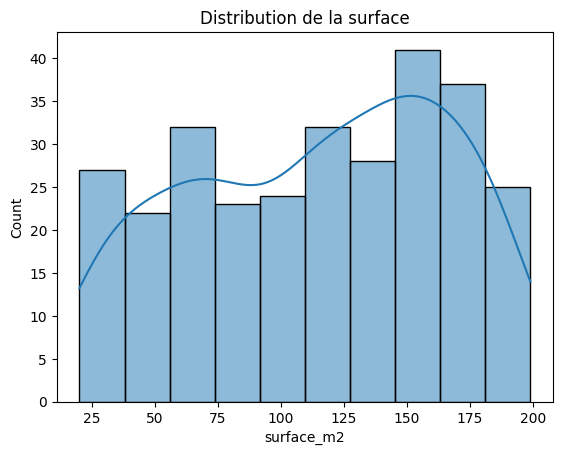

In [ ]:
#Afficher la distribution de la variable
sns.histplot(df['surface_m2'], kde=True) #kde=True permet de tracer la courbe
plt.title('Distribution de la surface')
plt.show()

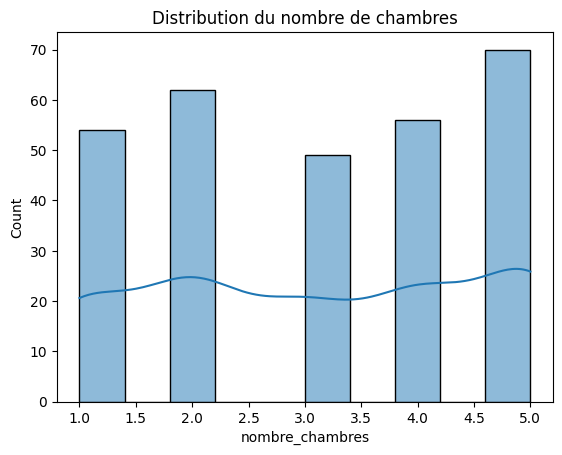

In [ ]:
#Affichons la distribution de la variable
sns.histplot(df['nombre_chambres'], kde=True)
plt.title('Distribution du nombre de chambres')
plt.show()

Si la distribution est asymetrique, mieux vaut utiliser la mediane car elle est plus robuste face aux valeurs aberrantes

In [ ]:
#verifions le total de chaque "nombre de chambre" des appartements

print(df['nombre_chambres'].value_counts().sort_index())

#pour le nettoyage de ces données "nombre_chambres", nous allons choisir la mediane

df['nombre_chambres'].fillna(df['nombre_chambres'].median(), inplace=True)

df['nombre_chambres'].isnull().sum()


nombre_chambres
1.0    54
2.0    62
3.0    49
4.0    56
5.0    70
Name: count, dtype: int64


<ipython-input-13-fcaab75b2f7a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nombre_chambres'].fillna(df['nombre_chambres'].median(), inplace=True)


np.int64(0)

In [ ]:
#verifions le total de chaque "ascenseurs" des appartements

print(df['ascenseur'].value_counts())

#pour le nettoyage, nous allons utiliser le mode, cst a dire celui qui vient le plus "Oui"

df['ascenseur'].fillna("Oui", inplace=True)

df['ascenseur'].isnull().sum()


ascenseur
Oui    177
Non    114
Name: count, dtype: int64


<ipython-input-14-583598b6435c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ascenseur'].fillna("Oui", inplace=True)


np.int64(0)

In [ ]:
#pour les surfaces en m2, nous allons prendre la mediane

df['surface_m2'].fillna(df['surface_m2'].median(), inplace=True)

df['surface_m2'].isnull().sum()

<ipython-input-15-1142d0163121>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['surface_m2'].fillna(df['surface_m2'].median(), inplace=True)


np.int64(0)

# **Detection des valeurs aberrantes**

In [ ]:
variables_num = ['surface_m2', 'nombre_chambres', 'etage', 'prix_mensuel']

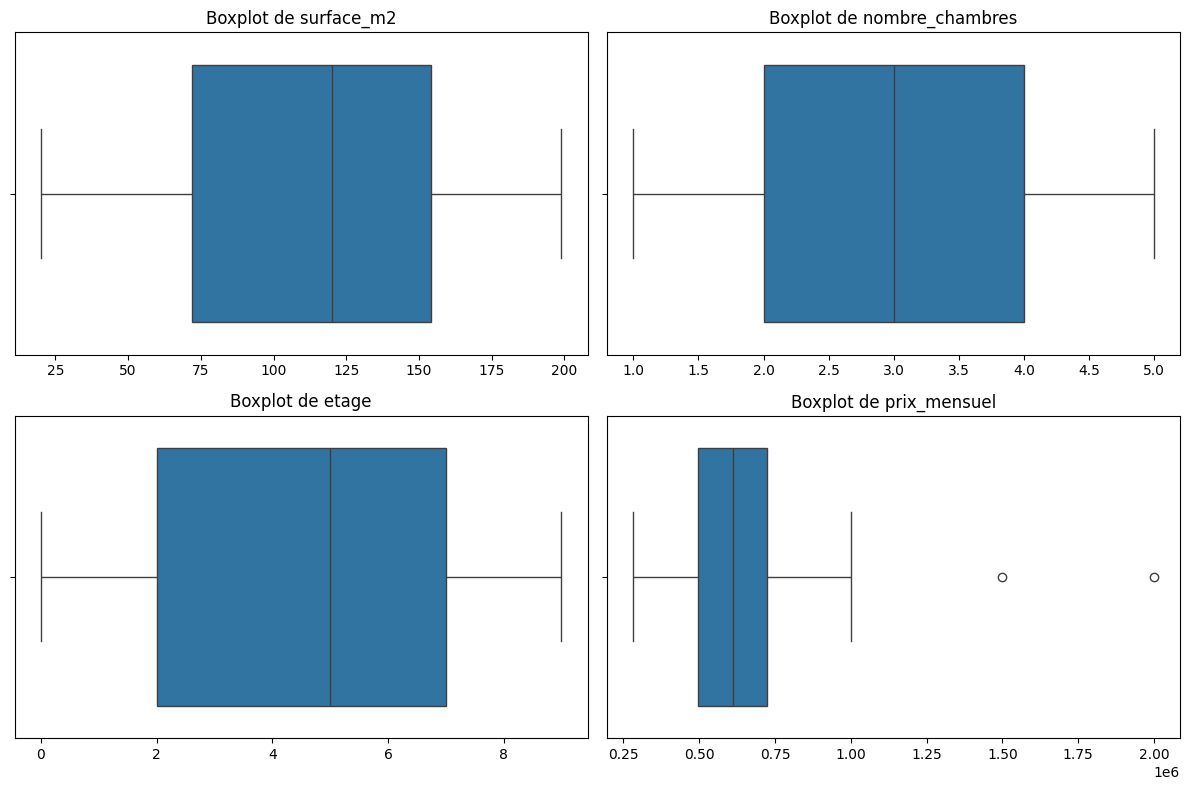

In [ ]:
#creation des boxplots
plt.figure(figsize=(12,8))
for i, var in enumerate(variables_num):
  plt.subplot(2,2, i+1)
  sns.boxplot(x=df[var])
  plt.title(f'Boxplot de {var}')
  plt.xlabel("")
plt.tight_layout() #evite le melange des valeurs
plt.show()

IQR = Inter Quartile Range/ etendue interquartile : c'est une mesure de dispersion qui indique l'ecart entre les valeurs du 3eme quartile (Q3) et du 1er quartile(Q1). Elle permet d'identifier les valeurs aberrantes (outliers) dans le jeu de données

# **IQR = Q3 - Q1**

Une valeur est considérée comme aberrante si elle est :  

# < a Q1 - 1.5 * IQR ou > a Q3 + 1.5 * IQR

Il a ete proposé par le staticien John Tukey comme seuil  de detection de valeurs anormalement eloignées de la majorité des données.

In [ ]:
#Detection des outliers dans prix_mensuel par la methode IQR
Q1 = df['prix_mensuel'].quantile(0.25)
Q3 = df['prix_mensuel'].quantile(0.75)

In [ ]:
#Nuage de point entre la suface et prix mensuel
IQR = Q3 - Q1
#SEUIL
Born_Inf = Q1 - 1.5 * IQR
Born_Sup = Q3 + 1.5 * IQR
print(f"Born_Inf : {Born_Inf}")
print(f"Born_Sup : {Born_Sup}")
#Detection des ligne avec la valeurr aberrantes
valeurs_aberrantes = df[(df['prix_mensuel'] < Born_Inf) | (df['prix_mensuel'] > Born_Sup)]
print(f"Nombre de valeurs aberrantes : {len(valeurs_aberrantes)}")

Born_Inf : 152633.5
Born_Sup : 1067659.5
Nombre de valeurs aberrantes : 2


**MATRICE DE CORRELATIONRICE**

In [ ]:
#Supression des valeurs aberrantes
#df = df[(df['prix_mensuel'] >= Born_Inf) & (df['prix_mensuel'] <= Born_Sup)]


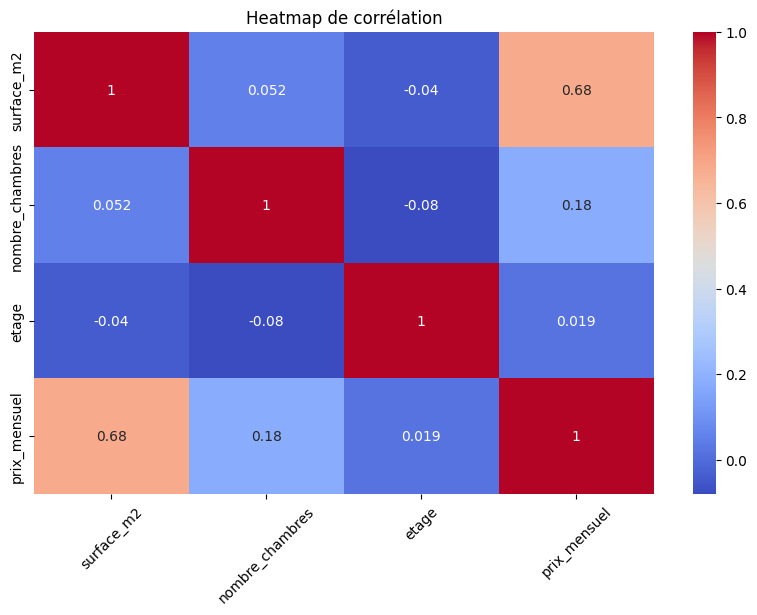

In [ ]:
#Créer une heatmap de corrélation pour les variables numériques

plt.figure(figsize=(10,6))
sns.heatmap(df.drop(['quartier', 'ascenseur', 'meublé'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation')
plt.xticks(rotation=45)
plt.show()

**Pourquoi** encoder les variables categorielle? En machine learning les models ne comprennent que des nombres, pas de texte ou de variables categorielles.

**A Retenir:** Avant de creer un model il faut que toutes les colonnes soient numériques. L'encodage permet de transformer les variables categorielles en chiffre comprehensibles par les algorithmes

**Label Encoding(codage d'etiquette**) chaque categorie est remplace par un chiffre unique "oui"=1 "non"=0

**One-ot Encodin:**g On crée un colonne par catégorie avec des 1 et 0

In [ ]:
df['ascenseur'].df['ascenseur'].replace({'Oui' : 1, 'Non' : 0}, inplace=True)
df['meublé'].df['meublé'].replace({'Oui' : 1, 'Non' : 0}, inplace=True)
df['quartier'].unique()
array(['yoff', 'Ouakam', 'liberte', 'Parcelle', 'plateau', 'Mermoz', 'Almadies'], dtype=object)
#Encoding on ot
quartier_encoded = pd.get_dummies(df['quartier'], prefix='quartier')
df = pd.concat([df, quartier_encoded], axis=1)s
df.head()



In [ ]:
#Convertir les colonnes catégorielles (quartier, ascenseur, meublé)

#df_onehot = pd.get_dummies(df, columns=['quartier', 'ascenseur', 'meublé'])
#df_onehot.head()

le = LabelEncoder()
df['quartier'] = le.fit_transform(df['quartier'])
df['ascenseur'] = le.fit_transform(df['ascenseur'])
df['meublé'] = le.fit_transform(df['meublé'])

df.head()

,surface_m2,nombre_chambres,quartier,etage,ascenseur,meublé,prix_mensuel
0,122.0,5.0,6,7,1,0,654021
1,199.0,3.0,3,1,0,0,773513
2,112.0,3.0,1,9,1,0,622110
3,34.0,3.0,6,7,1,0,413740
4,126.0,2.0,3,2,1,1,637774


In [ ]:
# regresion lineaire simple
#Prédire prix_mensuel à partir de surface_m2 uniquement

X = df[['surface_m2']]
y = df[['prix_mensuel']]

In [ ]:
#separer données entrainement et données test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#creation et entrainement du model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#faire la prediction

y_pred = model.predict(X_test)

In [ ]:
#Trouvons les coefs

print("\n Coefficients de la Regression linéaire simple : ")
print(f"Pente (a) : {model.coef_[0][0] : .2f}")
print(f"ordonnée a l'origine (b) : {model.intercept_[0] : .2f}")


 Coefficients de la Regression linéaire simple : 
Pente (a) :  2218.68
ordonnée a l'origine (b) :  357233.06


In [ ]:
#evaluons le modele

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Evaluation du modele ---")
print(f" mae : {mae : .2f}")
print(f" mse : {mse : .2f}")
print(f" rmse : {rmse : .2f}")

--- Evaluation du modele ---
 mae :  42705.92
 mse :  2983323980.51
 rmse :  54619.81


<Figure size 1500x600 with 0 Axes>

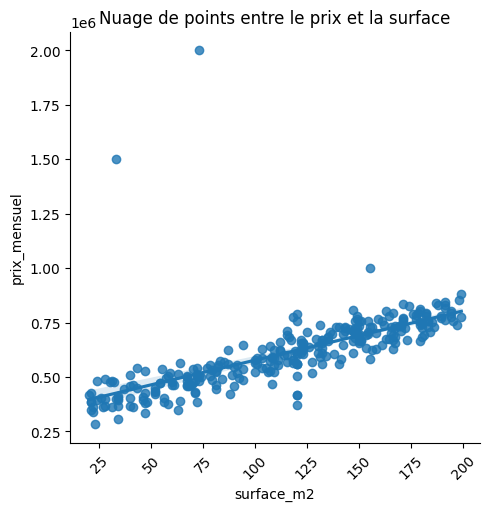

In [ ]:
#Tracer la droite de régression sur un nuage de points.

plt.figure(figsize=(15,6))
sns.lmplot(x='surface_m2', y='prix_mensuel', data=df)
plt.title('Nuage de points entre le prix et la surface')
plt.xticks(rotation=45)
plt.show()

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surface_m2       300 non-null    float64
 1   nombre_chambres  300 non-null    float64
 2   quartier         300 non-null    int64  
 3   etage            300 non-null    int64  
 4   ascenseur        300 non-null    int64  
 5   meublé           300 non-null    int64  
 6   prix_mensuel     300 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 16.5 KB


In [ ]:
#regression lineaire multiple

X_multi = df[['nombre_chambres', 'meublé', 'surface_m2', 'quartier', 'ascenseur', 'etage' ]]
y_multi = df[['prix_mensuel']]

In [ ]:
#separation données test et entrainement

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [ ]:
#creer et entrainer le model

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

LinearRegression()

In [ ]:
#prediction

y_predict_multi = model_multi.predict(X_test_multi)

In [ ]:
print("--- les coefficients sont :---")
coeff = pd.DataFrame({
    'Variables' : X_multi.columns,
    'Coefficients' : model_multi.coef_[0]
 })

print(coeff)

--- les coefficients sont :---
         Variables  Coefficients
0  nombre_chambres  14551.688363
1           meublé  59137.294030
2       surface_m2   2272.224662
3         quartier  -6788.920168
4        ascenseur  50392.502816
5            etage   2232.606707


In [ ]:
#Evaluation du modele

mae_multi = mean_absolute_error(y_test_multi, y_predict_multi)
mse_multi = mean_squared_error(y_test_multi, y_predict_multi)
rmse_multi = np.sqrt(mse_multi)

print("--- Evaluation du modele ---")
print(f" mae : {mae_multi : .2f}")
print(f" mse : {mse_multi : .2f}")
print(f"rmse : {rmse_multi : .2f}")



--- Evaluation du modele ---
 mae :  29958.48
 mse :  1461469350.49
rmse :  38229.17


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


In [ ]:
# Essayons d'ameliorer le modele avec Ridge

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

In [ ]:
#creation et entrainement du modele

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y_multi)

Ridge()

In [ ]:
#prediction

y_pred_ridge = ridge_model.predict(X_scaled)

In [ ]:
#cherchons les coefficients

for feature, coeff in zip(X_multi.columns, ridge_model.coef_) :
  print(f"{feature} : {coeff : .2f}")

nombre_chambres :  21466.92
meublé :  28646.19
surface_m2 :  115332.86
quartier : -11911.24
ascenseur :  23192.78
etage :  6503.24


In [ ]:
#cherchons les erreurs

mae_ridge = mean_absolute_error(y_multi, y_pred_ridge)
mse_ridge = mean_squared_error(y_multi, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("--- Evaluation du modele ---")
print(f" mae_ridge : {mae_ridge: .2f}")
print(f" mse_ridge : {mse_ridge: 2f}")
print(f" rmse_ridge : {rmse_ridge: 2f}")

--- Evaluation du modele ---
 mae_ridge :  37322.48
 mse_ridge :  12514623997.802591
 rmse_ridge :  111868.780264


In [ ]:
#Amelioration du modele avec Lasso

from sklearn.linear_model import Lasso

In [ ]:
#creation et entrainement du modele

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_scaled, y_multi)

Lasso()

In [ ]:
#prediction

y_pred_lasso = ridge_model.predict(X_scaled)

In [ ]:
#cherchons les coeffs

for feature, coef in zip(X_multi.columns, lasso_model.coef_) :
  print(f"{feature} : {coef : .2f}")

nombre_chambres :  21505.82
meublé :  28752.76
surface_m2 :  115734.30
quartier : -11908.83
ascenseur :  23305.13
etage :  6527.38


In [ ]:
#Evaluation du modele

mae_lasso = mean_absolute_error(y_multi, y_pred_lasso)
mse_lasso = mean_squared_error(y_multi, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("--- Evaluation du modele ---")
print(f" mae_lasso : {mae_lasso:.2f}")
print(f" mse_lasso : {mse_lasso:.2f}")
print(f" rmse_lasso : {rmse_lasso:.2f}")

--- Evaluation du modele ---
 mae_lasso : 37322.48
 mse_lasso : 12514623997.80
 rmse_lasso : 111868.78


In [ ]:
comparaison = pd.DataFrame({
    'Modele' : ['Regression lineaire simple', 'Regression lineaire multiple', 'Ridge', 'Lasso'],
    'MAE' : [mae, mae_multi, mae_ridge, mae_lasso],
    'MSE' : [mse, mse_multi, mse_ridge, mse_lasso],
    'RMSE' : [rmse, rmse_multi, rmse_ridge, rmse_lasso]

})

print(comparaison)

                         Modele           MAE           MSE           RMSE
0    Regression lineaire simple  42705.920176  2.983324e+09   54619.813077
1  Regression lineaire multiple  29958.475538  1.461469e+09   38229.168844
2                         Ridge  37322.484064  1.251462e+10  111868.780264
3                         Lasso  37322.484064  1.251462e+10  111868.780264


Le modele de regression lineaire multiple a le plus petit mae/rmse, ce qui nous montre qu'il est le plus performant parmi les modeles testés.

Le modele de regression lineaire multiple semble etre le meilleur choix pour predire le prix des locations

In [ ]:
df.head()

,surface_m2,nombre_chambres,quartier,etage,ascenseur,meublé,prix_mensuel
0,122.0,5.0,6,7,1,0,654021
1,199.0,3.0,3,1,0,0,773513
2,112.0,3.0,1,9,1,0,622110
3,34.0,3.0,6,7,1,0,413740
4,126.0,2.0,3,2,1,1,637774


In [ ]:
#Nouvelles données

test = pd.DataFrame({
    'surface_m2' : [97],
    'nombre_chambres' : [3],
    'quartier' : [6],
    'etage' : [2],
    'ascenseur' : [1],
    'meublé' : [1],
}, index=[0] )

In [ ]:
#utilisons le modele entrainé pour faire des predictions

feature_names = X_multi.columns

test = test.reindex(columns=feature_names, fill_value=0)

#prediction du prix

prix_location_predite = model_multi.predict(test)

print(f"La prediction est de :{prix_location_predite[0][0] : .2f} FCFA")


La prediction est de : 595944.99 FCFA
